# Cleaning & Visualizing Adult Data

## Dataset Information

The Adult dataset from the UCI Machine Learning Repository is a well-known dataset used for classification tasks, particularly for predicting whether an individual's income exceeds $50K per year based on census data. This dataset is also referred to as the "Census Income" dataset. It was donated to the UCI repository on April 30, 1996, by Barry Becker and Ronny Kohavi. 

The dataset is multivariate, containing 48,842 instances and 14 features. The features include demographic information such as age, work class, education level, marital status, occupation, race, sex, and others. The prediction task involves determining whether a person makes over 50K a year. The dataset has been extracted from the 1994 Census database with specific conditions applied to ensure reasonably clean records. The conditions include having an age over 16, an adjusted gross income over 100, a final weight over 1, and hours worked per week over 0.

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

%matplotlib inline


## Data retrieval and an overview of data status:

In [140]:
adult = fetch_ucirepo(id=2)

df = adult.data.features
target = adult.data.targets

In [141]:
df['target'] = target
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [142]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [143]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
target                4
dtype: int64

# Clean Data

In [144]:
x = df['marital-status'].unique()
x

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [145]:
y = df['relationship'].unique()
y

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [146]:
z = df['race'].unique()
z

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [147]:
df['target'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [148]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [149]:
df = df.astype(
    {'sex': 'category'}
)

df['target'] = df['target'].replace({True: 1, False: 0})
df['marital-status'] = df['marital-status'].replace({True: 1, False: 0})
df['sex'] = df['sex'].cat.codes

In [150]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [151]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

To reduce the complexity of the data and turn it into a logical and understandable basis, the state of the data is changed as follows:

marital status:

    If he has a wife and his wife is with him
    
    If he does not have a wife or lives far away from her

Relationship Status:
The depth of the relationship with the family is determined as follows:

    0- No family and no spouse

    1- Has a wife

    1- Any relationship (without children)

    2- Has a child

Unfortunately, race and income are related and this rate is currently determined as follows:

    1- White

    2- Asian-Pac-Islander

    3- Black/Amer-Indian-Eskimo/Other

And finally cleaning the target category

In [152]:
df['marital-status'].replace('Never-married', False, inplace=True)
df['marital-status'].replace('Married-civ-spouse', True, inplace=True)
df['marital-status'].replace('Divorced', False, inplace=True)
df['marital-status'].replace('Married-spouse-absent', True, inplace=True)
df['marital-status'].replace('Separated', False, inplace=True)
df['marital-status'].replace('Married-AF-spouse', True, inplace=True)
df['marital-status'].replace('Widowed', False, inplace=True)

df['relationship'].replace('Not-in-family', 0, inplace=True)
df['relationship'].replace('Husband', 1, inplace=True)
df['relationship'].replace('Wife', 1, inplace=True)
df['relationship'].replace('Own-child', 2, inplace=True)
df['relationship'].replace('Unmarried', 0, inplace=True)
df['relationship'].replace('Other-relative', 1, inplace=True)

df['race'].replace('White', 2,inplace=True)
df['race'].replace('Black', 0,inplace=True)
df['race'].replace('Asian-Pac-Islander', 1,inplace=True)
df['race'].replace('Amer-Indian-Eskimo', 0,inplace=True)
df['race'].replace('Other', 0,inplace=True)

df['target'].replace('<=50K', True, inplace=True)
df['target'].replace('<=50K.', True, inplace=True)
df['target'].replace('>50K', False, inplace=True)
df['target'].replace('>50K.', False, inplace=True)

> I have to apologize to you.
But unfortunately, it is a fact that men earn more than women in terms of genders, and due to the existence of racial issues, the highest incomes belong to whites, East Asians, and finally Indians, blacks, and others. There are races
(I hope these differences will disappear soon)

## Checking Cleaned Data 

In [153]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,False,Adm-clerical,0,2,1,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,Bachelors,13,True,Exec-managerial,1,2,1,0,0,13,United-States,True
2,38,Private,215646,HS-grad,9,False,Handlers-cleaners,0,2,1,0,0,40,United-States,True
3,53,Private,234721,11th,7,True,Handlers-cleaners,1,0,1,0,0,40,United-States,True
4,28,Private,338409,Bachelors,13,True,Prof-specialty,1,0,0,0,0,40,Cuba,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,False,Prof-specialty,0,2,0,0,0,36,United-States,True
48838,64,NaN,321403,HS-grad,9,False,NaN,1,0,1,0,0,40,United-States,True
48839,38,Private,374983,Bachelors,13,True,Prof-specialty,1,2,1,0,0,50,United-States,True
48840,44,Private,83891,Bachelors,13,False,Adm-clerical,2,1,1,5455,0,40,United-States,True


### Checking Country Relationship

In [154]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [155]:
us_df = df[df['native-country'] == 'United-States']
mex_df = df[df['native-country'] == 'Mexico']
Philippines_df = df[df['native-country'] == 'Philippines']

us_df['target'].value_counts()


target
True     33138
False    10694
Name: count, dtype: int64

In [156]:
mex_df['target'].value_counts()

target
True     904
False     47
Name: count, dtype: int64

In [157]:
df['target'].value_counts()

target
True     37155
False    11687
Name: count, dtype: int64

In [158]:
Philippines_df['target'].value_counts()


target
True     210
False     85
Name: count, dtype: int64

> as we can see not powerful relationship between native country and target

## Checking Anothers Relationship

Checking relationships pair to pair

<Axes: xlabel='sex', ylabel='Density'>

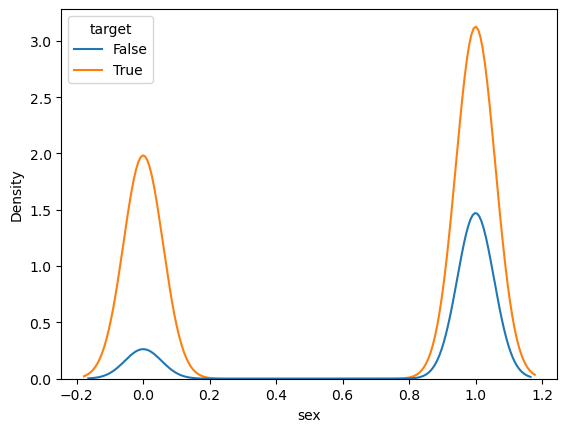

In [159]:
sns.kdeplot(data=df, x="sex", hue='target',)


<Axes: xlabel='target', ylabel='age'>

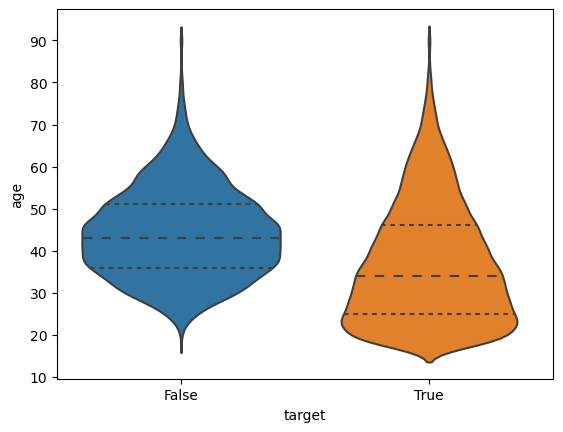

In [160]:
sns.violinplot(data=df, x="target", y="age", inner="quartile", split=True)


c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


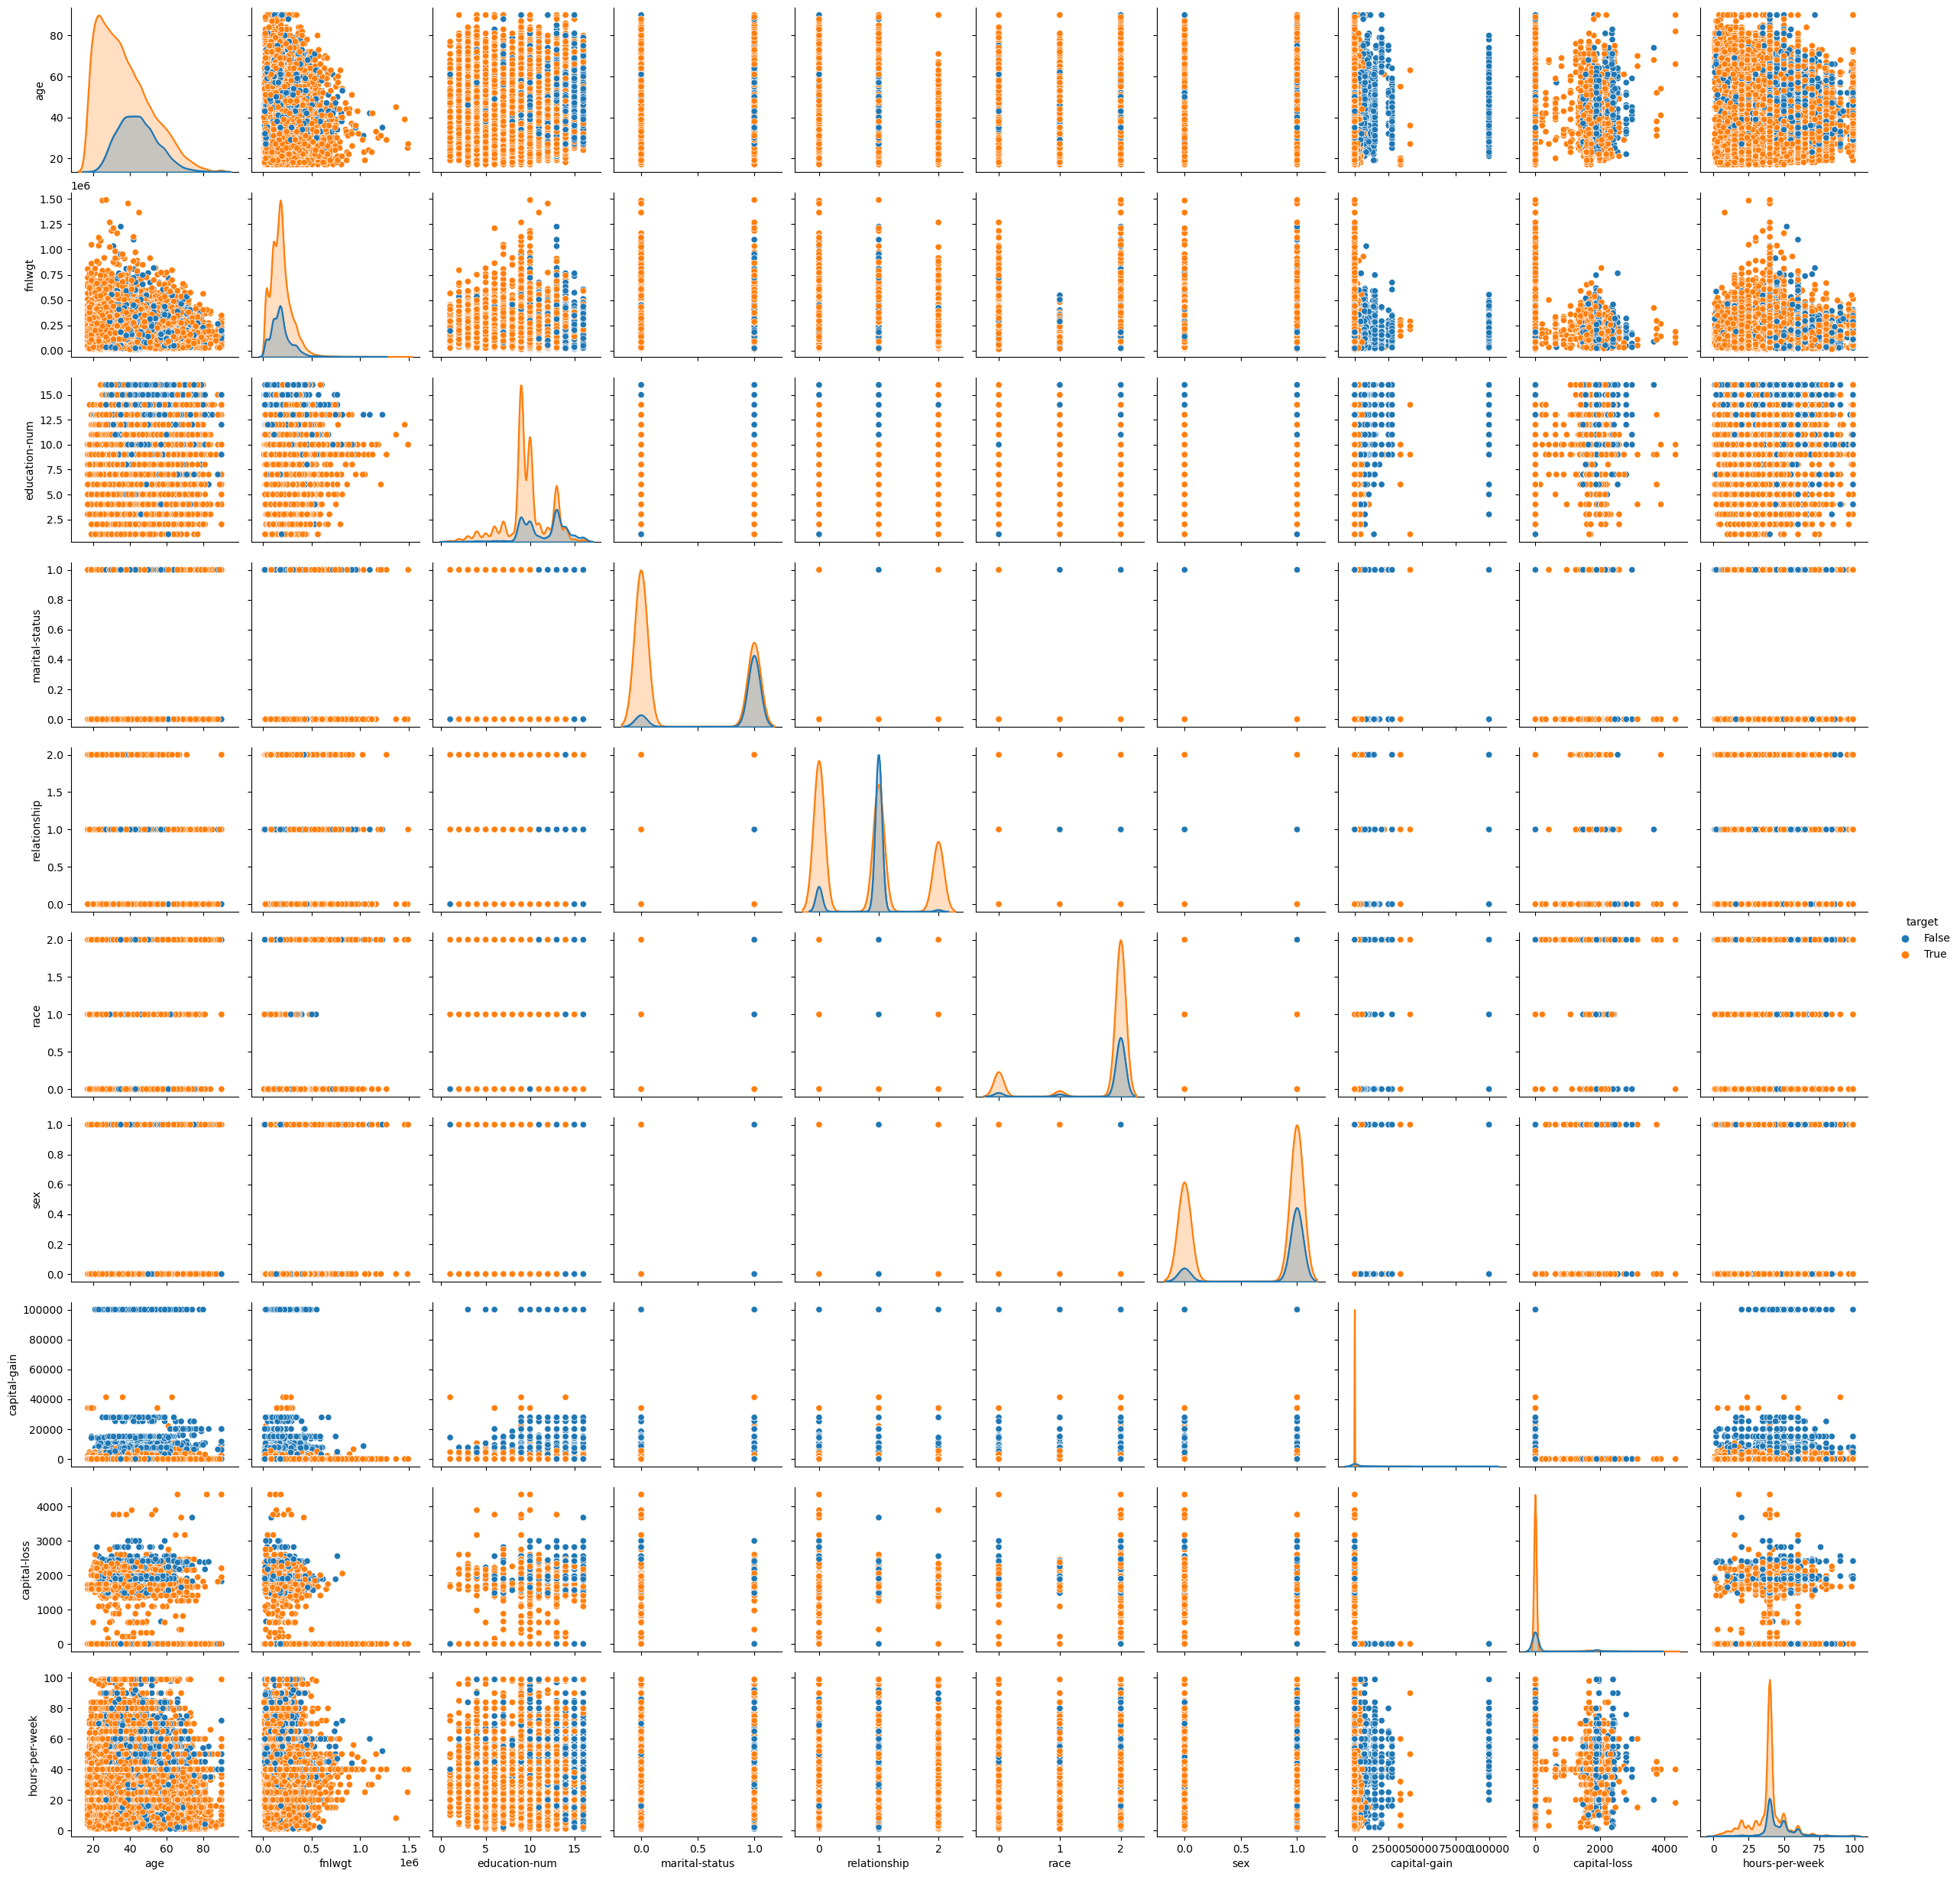

In [161]:
g = sns.pairplot(
    data=df,
    hue='target'
)

g.map_diag(sns.kdeplot, )

In [162]:
df.describe()


,age,fnlwgt,education-num,relationship,race,sex,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,0.792658,1.741186,0.668482,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,0.689050,0.647728,0.470764,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,1.000000,2.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,2.000000,2.000000,1.000000,99999.000000,4356.000000,99.000000


In [163]:
copy_df = df.copy(deep=False)
del copy_df['workclass']
del copy_df['occupation']
del copy_df['native-country']


<Axes: >

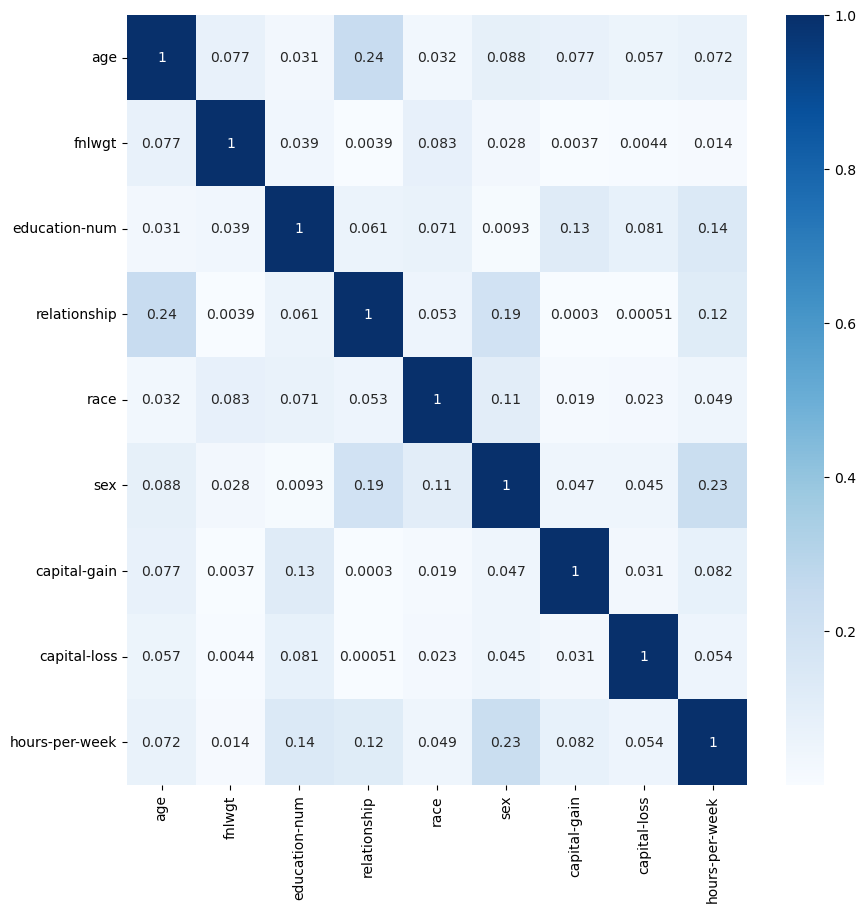

In [164]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
check_pair = df[numeric_cols]

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(check_pair.corr()), annot=True, cmap='Blues', ax=ax)